In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [14]:
test_filter = np.load('test_filter.npy')
test_filter = 1 - test_filter
test_filter = test_filter[:,:,:,0]


h = np.load('random_h.npy')
h = h[:,:,:,0]

y_test = np.load('random_test_y.npy')
x_test = np.load('random_test_x.npy')
x_test = x_test[:,:,:,0]

In [15]:
def top_k(a, k):
    idx = np.argpartition(-a.ravel(),k)[:k]
    return np.column_stack(np.unravel_index(idx, a.shape))

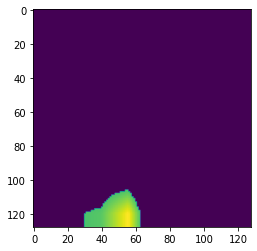

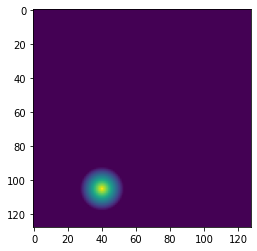

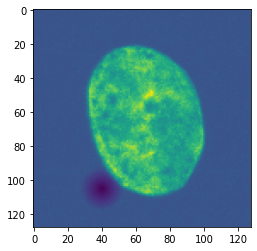

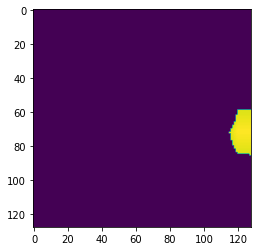

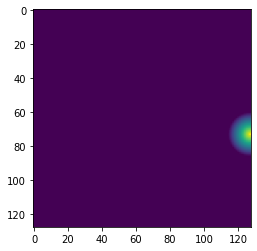

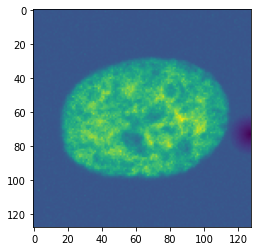

In [17]:
ans = []
u = True
d = True
for i in range(len(test_filter)):
    if y_test[i] == 0:
        continue
        
    ph = h[i]
    pf = test_filter[i]
    px = x_test[i]
    
    non_zero = np.column_stack(np.where(pf > 0))
    non_zero_count = len(non_zero)
    
    top_k_ph = top_k(ph, non_zero_count)
    top_k_pf = top_k(pf, non_zero_count)
    
    z = np.zeros(ph.shape)
    for l in top_k_ph:
        x, y = l
        z[x][y] = ph[x][y]

    
    
    sh = set([tuple(x) for x in top_k_ph.tolist()])
    sf = set([tuple(x) for x in top_k_pf.tolist()])
    ins = len(sh.intersection(sf))
    uni = len(sh.union(sf))
    iou = ins/uni
    ans.append(iou)
    
    if iou > 0.8 and u:
        u = False
        plt.figure()
        plt.imshow(z)
        plt.figure()
        plt.imshow(pf)
        plt.figure()
        plt.imshow(px)
    if iou < 0.1 and d:
        d = False
        plt.figure()
        plt.imshow(z)
        plt.figure()
        plt.imshow(pf)
        plt.figure()
        plt.imshow(px)
        
    

In [18]:
print(np.mean(ans))

0.19281078585642514


In [19]:
print(np.std(ans))

0.16657972600635435


In [20]:
print(np.max(ans))

0.8350515463917526
